In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline 


In [79]:
booze = pd.read_csv('../iowa_liquor_sales_proj_2.csv')
booze.shape

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2709552, 24)

In [86]:
#Finding patterns for store location
import re
#tester = booze.head()
# tester
# pattern2 = r'[(].+[)]'
# tester['Store Location'].apply(lambda x: re.findall(pattern2,x))

0     [(40.39978, -91.387531)]
1     [(40.739238, -95.02756)]
2    [(40.624226, -91.373211)]
3                           []
4    [(41.985887, -92.579244)]
Name: Store Location, dtype: object

In [87]:
booze.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [89]:
#Converting date column to datetime format
booze['Date'] = pd.to_datetime(booze['Date'], infer_datetime_format=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709552 entries, 0 to 2709551
Data columns (total 24 columns):
Invoice/Item Number      object
Date                     datetime64[ns]
Store Number             int64
Store Name               object
Address                  object
City                     object
Zip Code                 object
Store Location           object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Vendor Name              object
Item Number              int64
Item Description         object
Pack                     int64
Bottle Volume (ml)       int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold             int64
Sale (Dollars)           object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(13)
memory usage: 496.1+ MB


In [90]:
#Cleaning columns to be numeric
booze['Sale (Dollars)'] = booze['Sale (Dollars)'].str.replace('$', '').astype(float)
booze['State Bottle Retail'] = booze['State Bottle Retail'].str.replace('$', '').astype(float)
booze['State Bottle Cost'] = booze['State Bottle Cost'].str.replace('$', '').astype(float)

In [122]:
#Turning non-numeric numeric columns into objects 
booze['Category'] = booze['Category'].astype(object)
booze['Vendor Number'] = booze['Vendor Number'].astype(object)
booze['Item Number'] = booze['Item Number'].astype(object)
booze['County Number'] = booze['County Number'].astype(object)
booze['Store Number'] = booze['Store Number'].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709552 entries, 0 to 2709551
Data columns (total 24 columns):
Invoice/Item Number      object
Date                     datetime64[ns]
Store Number             object
Store Name               object
Address                  object
City                     object
Zip Code                 object
Store Location           object
County Number            object
County                   object
Category                 object
Category Name            object
Vendor Number            object
Vendor Name              object
Item Number              object
Item Description         object
Pack                     int64
Bottle Volume (ml)       int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold             int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(15)
memory usage: 496.1+ MB


In [123]:
#Selecting only the numeric columns
numeric_columns = []
for col in booze.columns:
    if isinstance(booze[col][0], (np.float64, np.int64)):
        numeric_columns.append(col)

In [130]:
#creating subframe to identify  outliers, standardizing
mask = booze[numeric_columns]
standard_mask = StandardScaler()
mask = pd.DataFrame(standard_mask.fit_transform(mask), columns=numeric_columns)

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,-0.830715,-0.318784,0.555044,0.554568,-0.163345,0.084416,-0.156545,-0.156408
1,-0.830715,-0.318784,0.555044,0.554568,0.091989,0.492065,0.002779,0.003080
2,1.016256,-1.416709,-0.229175,-0.229885,-0.333568,-0.275168,-0.305247,-0.305175
3,-1.226494,1.511090,1.726341,1.726328,-0.291012,0.077356,-0.129991,-0.129603
4,1.016256,-1.416709,-0.229175,-0.229885,-0.333568,-0.275168,-0.305247,-0.305175


In [150]:
#LOCATING OUTLIERS and DROPPING THEM
index_list = []

for col in mask.columns: 
    df = mask.loc[(mask[col] > 6) | (mask[col] < -6)]
    index_list.extend(list(df.index))

index_list = list(set(index_list))

todrop = mask.iloc[index_list]

#Exploring outliers- the outliers seem well dispersed between cities
booze.iloc[index_list].groupby('City')[['Store Number']].nunique()
#The types of liquors prevalent in the subgroup are also dispersed between brand types 
booze.iloc[index_list].groupby('Item Description')[['Store Number']].nunique().sort_values(by='Store Number', ascending=False)

#Will run with and without these outliers, creating subset with outliers removed,
#dropped observations represent less than 0.5% of observations and are more than 6 standard
#deviations from the mean
booze_cleaned = booze.drop(todrop.index)
mask = mask.drop(todrop.index)

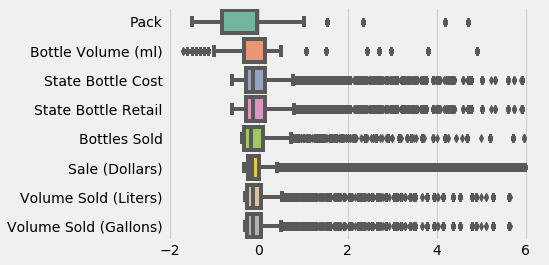

In [153]:
#Looking at distributions
#The outliers from pack size appear to be reasonable
#the fireball mini dispenser comprises 92% of the bottle volume outliers above 2 stds. This is ok. 
#USE two lines of code below code to explore further, replacing column as aprpriorate
#list_pack = list(mask.loc[mask['Bottles Sold'] > 3].index)
# booze.iloc[list_pack]
plt.style.use('fivethirtyeight')
ax = sns.boxplot(data=mask, orient="h", palette="Set2")

In [195]:
#Splitting between 2015 and 2016
mask_dates = (booze_cleaned['Date'] > '12/31/2014') & (booze_cleaned['Date'] < '1/1/2016')
booze_2015 = booze_cleaned.loc[mask_dates]
mask_dates2 = (booze_cleaned['Date'] > '12/31/2015')
booze_2016 = booze_cleaned.loc[mask_dates2]

2696584

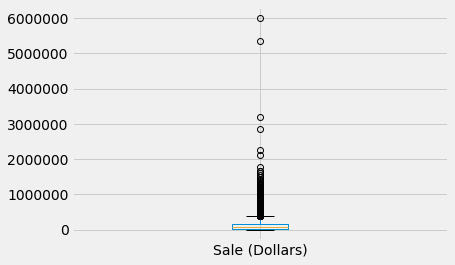

In [201]:

target = booze_2015.groupby('Store Number')[['Sale (Dollars)']].sum().sort_values(by='Sale (Dollars)')
target.plot.box()

In [205]:
booze_2015.loc[booze_2015['Store Number'] == 5213]

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1977613,S29879300001,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,11774,Black Velvet,24,375,3.07,4.61,24,110.64,9.00,2.38
2003818,S29879300007,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,23824,Five Star,24,375,2.00,3.00,24,72.00,9.00,2.38
2011008,S29879300008,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,26820,Jack Daniels Old #7 Black Lbl Flat,24,375,7.00,10.50,5,52.50,1.88,0.50
2046304,S29879300005,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,36301,Hawkeye Vodka 80 Prf Mini,12,500,4.13,6.20,12,74.40,6.00,1.59
2046920,S29879300004,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,36304,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.00,2.38
2076134,S29879800001,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,41783,Uv Blue Raspberry Vodka Mini,6,500,4.89,7.34,6,44.04,3.00,0.79
2092683,S29879300006,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,43333,Captain Morgan Spiced Rum Pet,48,200,2.50,3.75,48,180.00,9.60,2.54
2110207,S29879300003,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,52593,E & J Vs Brandy,24,200,1.96,2.94,24,70.56,4.80,1.27
2111208,S29879300002,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,52596,E & J Vs,12,750,5.92,8.88,1,8.88,0.75,0.20


In [207]:
booze.loc[booze['Store Name'] == 'Garner One Stop']

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1977613,S29879300001,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,11774,Black Velvet,24,375,3.07,4.61,24,110.64,9.00,2.38
2003818,S29879300007,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,23824,Five Star,24,375,2.00,3.00,24,72.00,9.00,2.38
2011008,S29879300008,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,26820,Jack Daniels Old #7 Black Lbl Flat,24,375,7.00,10.50,5,52.50,1.88,0.50
2046304,S29879300005,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,36301,Hawkeye Vodka 80 Prf Mini,12,500,4.13,6.20,12,74.40,6.00,1.59
2046920,S29879300004,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,36304,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.00,2.38
2076134,S29879800001,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,41783,Uv Blue Raspberry Vodka Mini,6,500,4.89,7.34,6,44.04,3.00,0.79
2092683,S29879300006,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,43333,Captain Morgan Spiced Rum Pet,48,200,2.50,3.75,48,180.00,9.60,2.54
2110207,S29879300003,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,52593,E & J Vs Brandy,24,200,1.96,2.94,24,70.56,4.80,1.27
2111208,S29879300002,2015-12-26,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,52596,E & J Vs,12,750,5.92,8.88,1,8.88,0.75,0.20
2188669,S30017100028,2016-01-04,5213,Garner One Stop,"2506, 280TH ST",MONTROSE,52639,"2506, 280TH ST\nMONTROSE 52639\n(40.552204, -9...",56,Lee,...,8825,Lauder's Scotch Traveler,12,750,5.13,7.70,2,15.40,1.50,0.40
